# 🔍 EDA (Исследовательский анализ данных)

## 🎯 Ключевая цель
Получение ответов на поставленные вопросы и проверка гипотез на основе исследовательского анализа данных.

---

## 📋 Этапы исследования

### 1. Подготовка данных
- Импорт необходимых библиотек
- Подключение и загрузка очищенного файла с данными для дальнейшей работы

### 2. Проверка данных на валидность
- **Первичный осмотр**:
    - Просмотр случайных строк данных для понимания структуры
    - Проверка на наличие пропущенных значений
- **Анализ распределений**:
    - Изучение распределений ключевых числовых и категориальных признаков

### 3. Проверка гипотез
- **Практическая часть**:
    - Подтверждение или опровержение трех практических гипотез
- **Теоретическая часть**:
    - Проверка одной теоретической гипотезы

### 4. Визуализация для теоретических задач
- Построение двух распределений, соответствующих теоретическим задачам исследования

---

## 📊 Итоги EDA
На основе проведенного исследовательского анализа будут сделаны выводы по проверенным гипотезам и проанализированным распределениям.

## 1.1. Импортируем нужные библиотеки

In [50]:
import pandas as pd

from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

from utils import joinpath, hist_boxplot, get_total_price_by_rule, check_ttest_ind
from utils.EDA import check_ttest_1samp

## 1.2. Загружаем данные для дальнейшей работы с ними

In [51]:
# Настройка для `cleaned_rides_users_subscriptions_go.csv`
rides_users_subscriptions_options = {
    "filepath_or_buffer": joinpath("data", "cleaned_rides_users_subscriptions_go.csv"),
    "encoding": "utf-8",
    "parse_dates": ["date"],
}

rides_users_subscriptions_df = pd.read_csv(**rides_users_subscriptions_options)

## 2. Проверка данных на валидность

In [52]:
rides_users_subscriptions_df.sample(10)

,user_id,distance,duration,date,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
10455,993,1467.0,19.0,2021-01-29,Алексей,33,Москва,free,8,50,0
9005,889,5800.0,29.0,2021-08-13,Эльвира,24,Краснодар,free,8,50,0
6432,692,2753.0,11.0,2021-04-11,Денис,21,Сочи,ultra,6,0,199
772,84,3121.0,19.0,2021-08-29,Анна,13,Екатеринбург,ultra,6,0,199
10267,979,3157.0,28.0,2021-10-21,Антон,20,Екатеринбург,free,8,50,0
10620,1005,3102.0,18.0,2021-05-28,Айдар,28,Москва,free,8,50,0
8479,849,4174.0,21.0,2021-07-31,Каролина,37,Тюмень,free,8,50,0
6929,730,4133.0,23.0,2021-01-29,Анна,28,Омск,free,8,50,0
13677,1228,2436.0,24.0,2021-03-26,Артемий,28,Краснодар,free,8,50,0
2406,256,3063.0,26.0,2021-06-30,Есения,33,Сочи,ultra,6,0,199


In [53]:
rides_users_subscriptions_df.isna().sum()

user_id              0
distance             0
duration             0
date                 0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

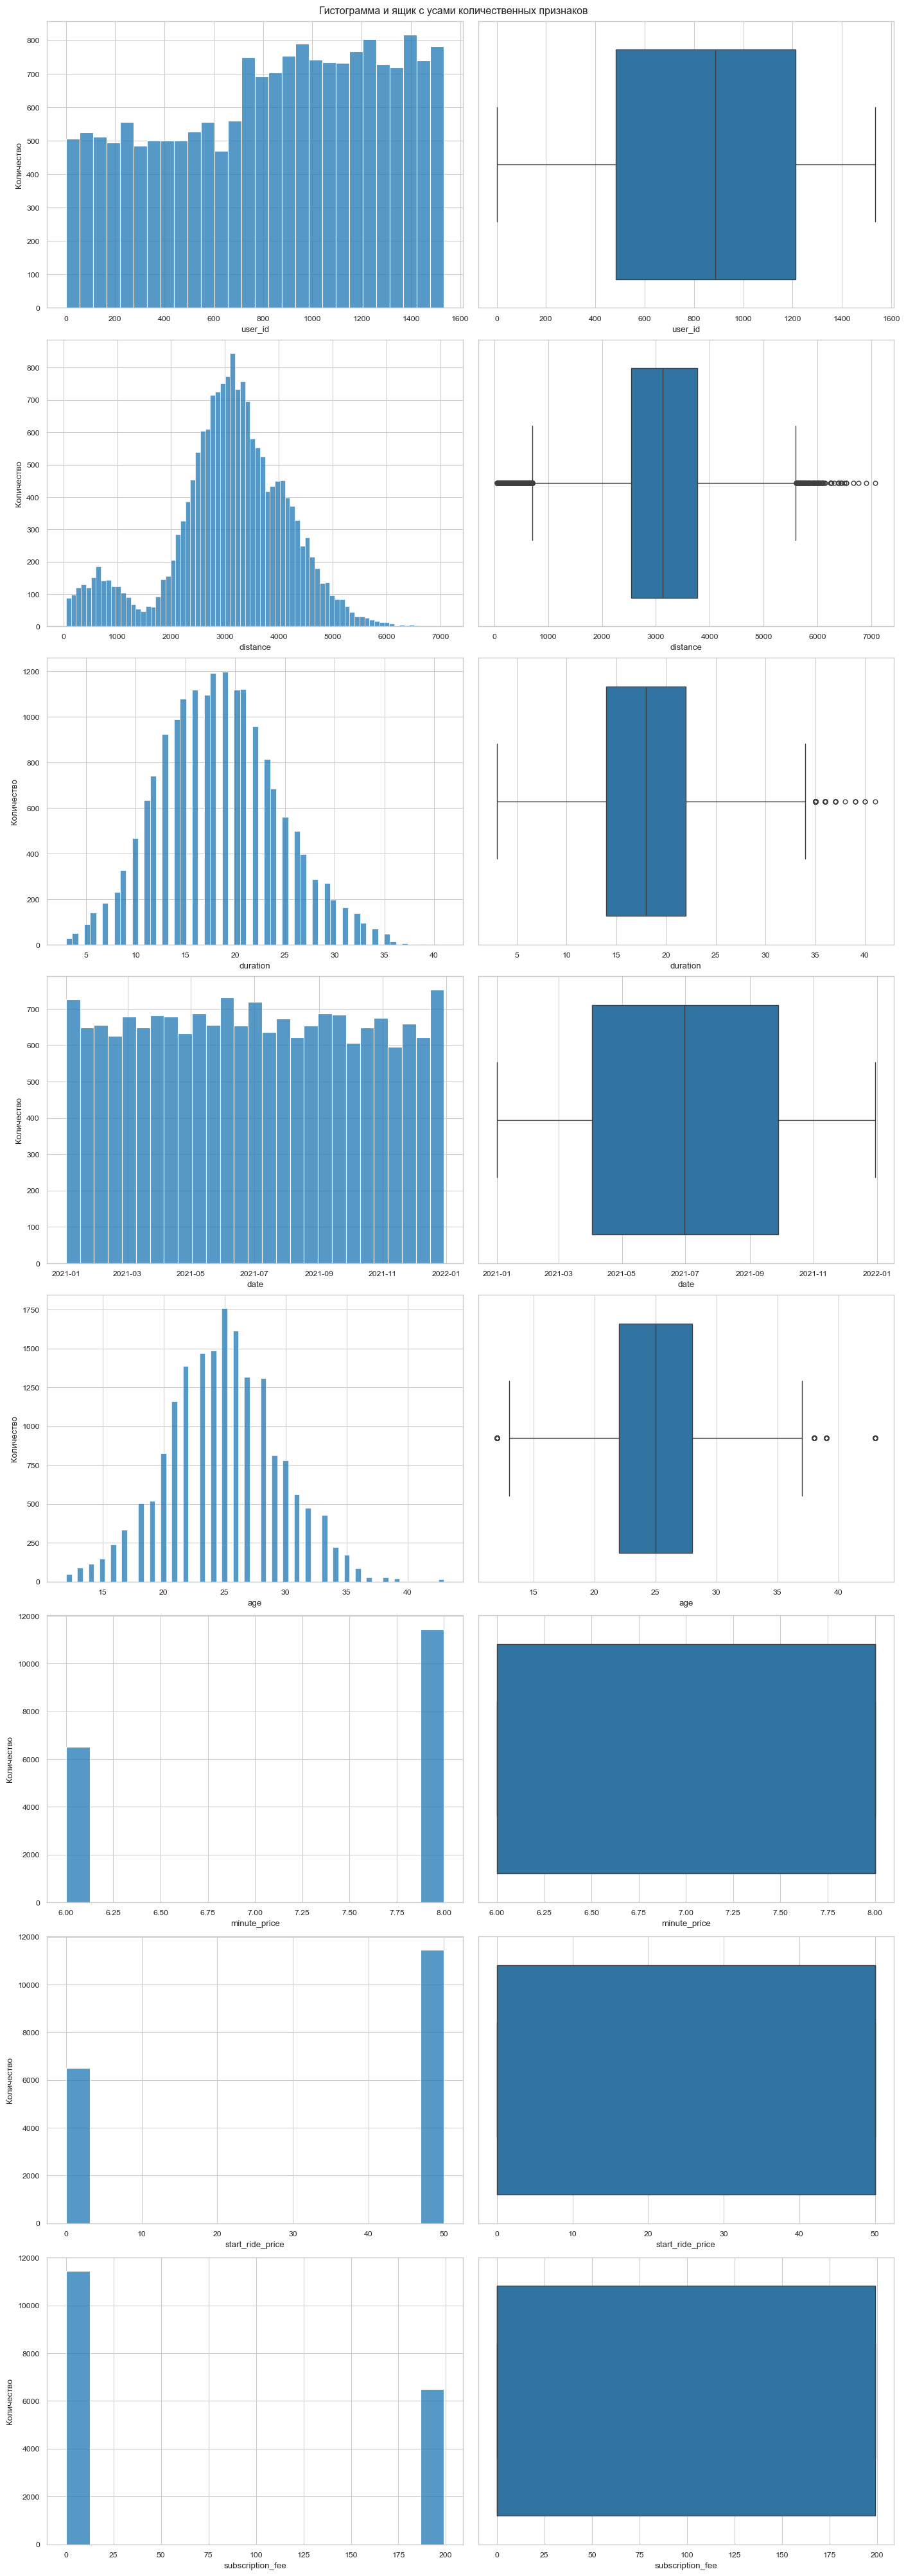

In [54]:
hist_boxplot(
    rides_users_subscriptions_df,
    columns=rides_users_subscriptions_df.select_dtypes(exclude=["object"]).columns,
)

Данные валидны можно начинать EDA по гистограмме с `user_id` можно понять сразу, что более новые пользователи пользуются более часто нежели старые может говорить о маркетинговом ходу сделанным для всех новых пользователях либо другой акции.

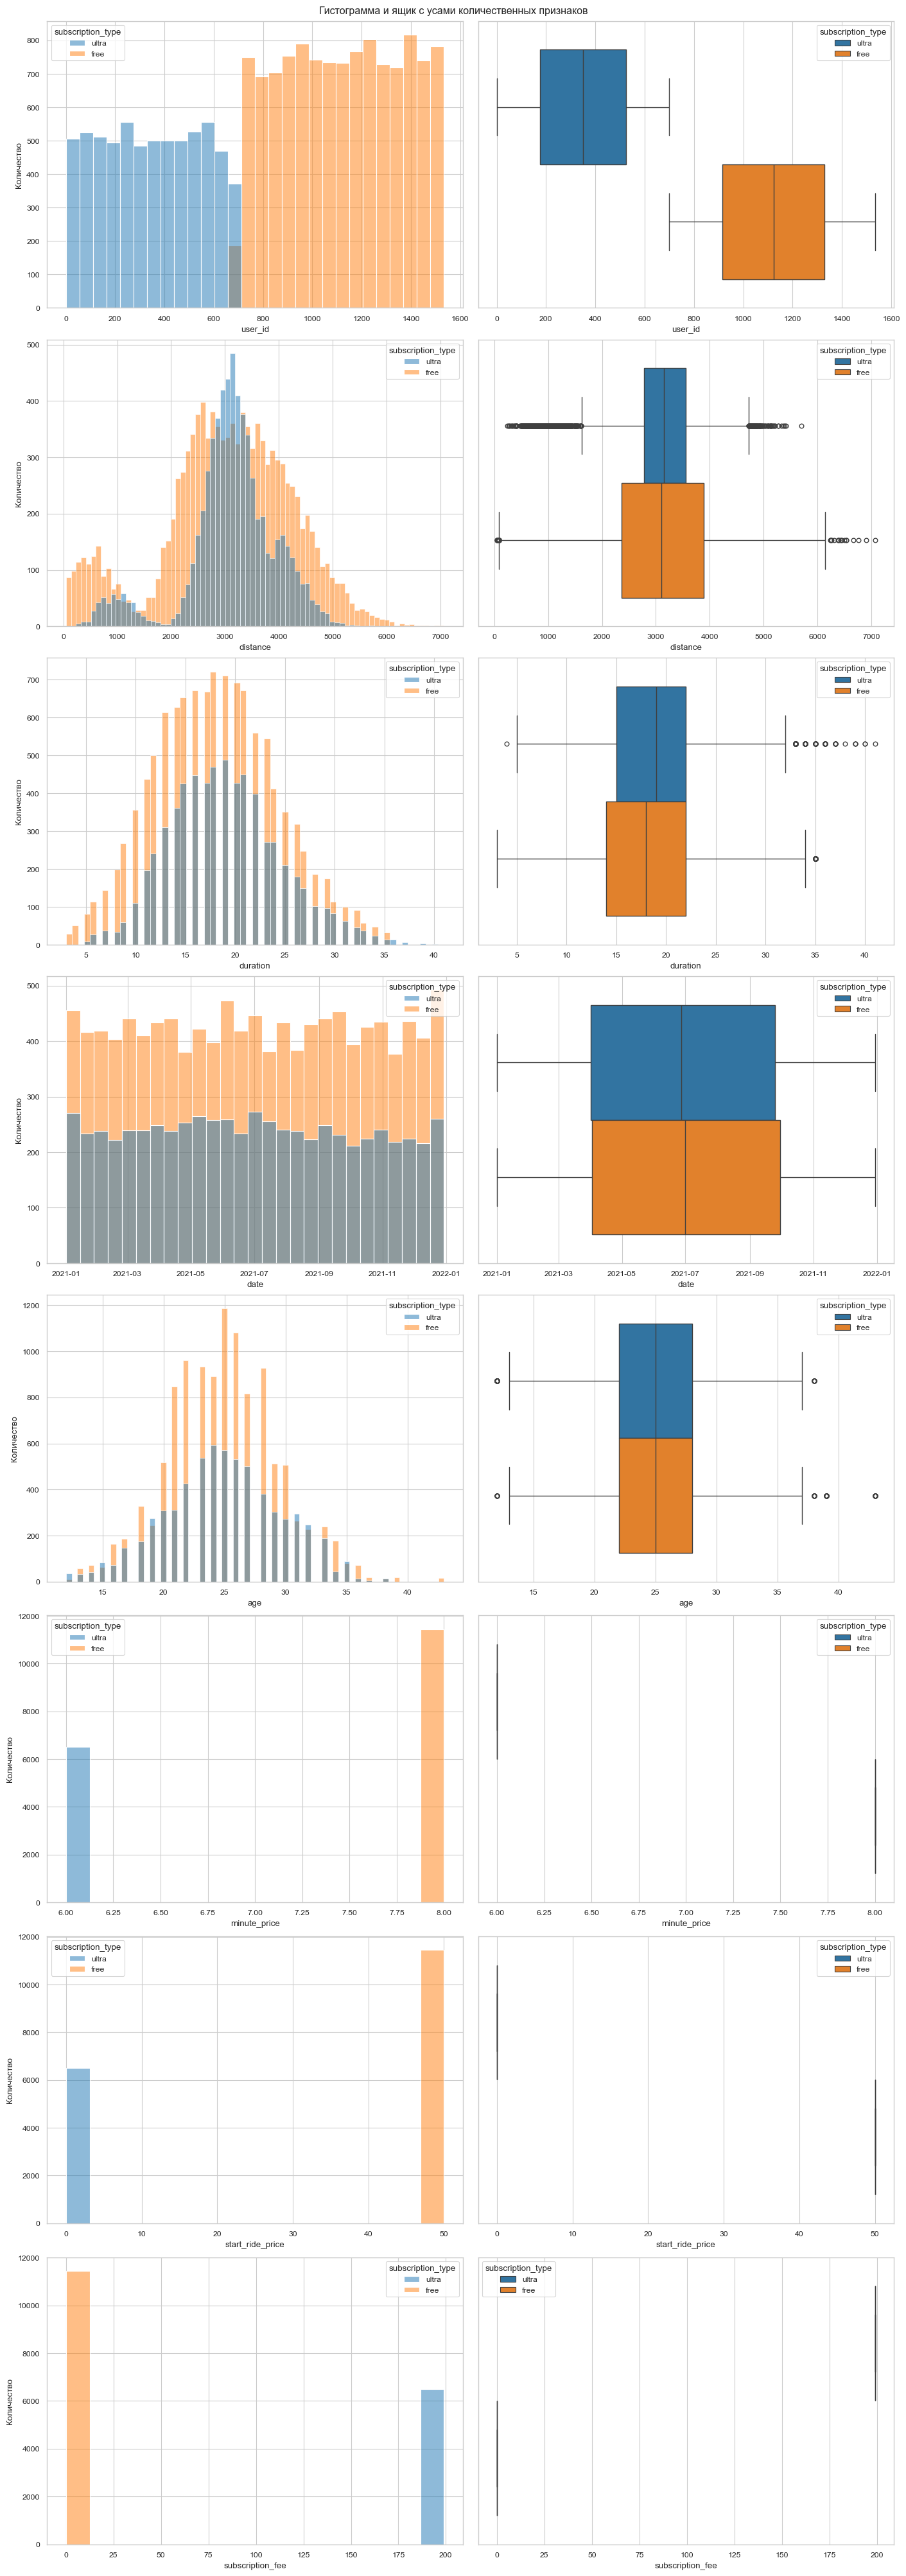

In [76]:
hist_boxplot(
    rides_users_subscriptions_df,
    columns=rides_users_subscriptions_df.select_dtypes(exclude=["object"]).columns,
    hue="subscription_type",
)

Видим некоторые различия между поведением пользователей с подпиской и без, в частности именно новые пользователи являются пользователями с подписками так же видим по `boxplot` графику по дистанции есть много отклонений в дистанциях в частности именно для пользователей без подписки может говорить, что пользуются самокатами, чтобы дурачиться.

## 3.1. EDA

Для удобства разделим данные по типам подписок.

In [55]:
users_with_sub = rides_users_subscriptions_df[
    rides_users_subscriptions_df["subscription_type"] == "ultra"
]

users_no_sub = rides_users_subscriptions_df[
    rides_users_subscriptions_df["subscription_type"] != "ultra"
]

Разделили людей на пользователей с подпиской и без для удобства анализа.

In [56]:
total_price_with_sub = get_total_price_by_rule(users_with_sub, "ME")

total_price_no_sub = get_total_price_by_rule(users_no_sub, "ME")

Создали таблицу с помесячным доходом для пользователей с подпиской и без, посмотрим их.

In [57]:
total_price_no_sub

date
2021-01-31    193060.0
2021-02-28    165392.0
2021-03-31    186218.0
2021-04-30    185118.0
2021-05-31    187280.0
2021-06-30    191286.0
2021-07-31    184364.0
2021-08-31    186408.0
2021-09-30    192758.0
2021-10-31    180812.0
2021-11-30    178006.0
2021-12-31    194318.0
Freq: ME, Name: total_price, dtype: float64

In [58]:
total_price_with_sub

date
2021-01-31    144108.0
2021-02-28    124572.0
2021-03-31    142608.0
2021-04-30    137318.0
2021-05-31    149235.0
2021-06-30    143834.0
2021-07-31    143466.0
2021-08-31    138534.0
2021-09-30    129337.0
2021-10-31    133932.0
2021-11-30    126546.0
2021-12-31    131047.0
Freq: ME, Name: total_price, dtype: float64

Как видим все создалось верно.

In [59]:
total_price = (total_price_no_sub + total_price_with_sub).to_frame()

total_price

,total_price
date,
2021-01-31,337168.0
2021-02-28,289964.0
2021-03-31,328826.0
2021-04-30,322436.0
2021-05-31,336515.0
2021-06-30,335120.0
2021-07-31,327830.0
2021-08-31,324942.0
2021-09-30,322095.0


Видим, что в среднем помесячная выручка в районе 300к рублей доход вполне сбалансирован и крепко держится на этих позиция, посмотрим для начала стандартные статистики для этих данных, а затем конкретные проценты доходов по типам подписок.

In [60]:
total_price.describe().T

,count,mean,std,min,25%,50%,75%,max
total_price,12.0,322463.083333,13798.757905,289964.0,320257.25,325153.5,330399.5,337168.0


In [61]:
total_price["percent_with_sub"] = round(
    total_price_with_sub / total_price["total_price"], 2
)
total_price["percent_no_sub"] = round(
    total_price_no_sub / total_price["total_price"], 2
)

total_price

,total_price,percent_with_sub,percent_no_sub
date,,,
2021-01-31,337168.0,0.43,0.57
2021-02-28,289964.0,0.43,0.57
2021-03-31,328826.0,0.43,0.57
2021-04-30,322436.0,0.43,0.57
2021-05-31,336515.0,0.44,0.56
2021-06-30,335120.0,0.43,0.57
2021-07-31,327830.0,0.44,0.56
2021-08-31,324942.0,0.43,0.57
2021-09-30,322095.0,0.40,0.60


In [62]:
total_price.describe().T

,count,mean,std,min,25%,50%,75%,max
total_price,12.0,322463.083333,13798.757905,289964.00,320257.2500,325153.50,330399.5000,337168.00
percent_with_sub,12.0,0.425833,0.013114,0.40,0.4275,0.43,0.4300,0.44
percent_no_sub,12.0,0.574167,0.013114,0.56,0.5700,0.57,0.5725,0.60


Пользователи с подпиской приносят доход в меньшем объеме, чем пользователи без подписки на 12-20% в месяц, что достаточно значимо, но надо учесть соотношение количества пользователей с подпиской и без возможная рекомендация перераспределить цены в подписках.

In [63]:
users_count = users_with_sub["user_id"].nunique() + users_no_sub["user_id"].nunique()

round(users_with_sub["user_id"].nunique() / users_count, 2), round(
    users_no_sub["user_id"].nunique() / users_count, 2
)

(0.46, 0.54)

Видим, что с подпиской 46%, а без 54%, что может говорить достаточный хороший показатель количества пользователей с подпиской, но по данным помесячной выручке без подписки приносят больше от 12 до 20% отсюда следует, что пользователи с подпиской в среднем тратят меньше, чем без подписки это может быть и хорошо и плохо, если важен доход следует перерассмотреть ценовой сегмент в подписках и уменьшить разницу, чтобы доход был примерно равным, но для пользователей с подпиской другие преимущества.

## 3.2. Проверка гипотез

### 3.2.1. №1 (Практическая) Пользователи с подпиской тратят в среднем больше времени на поездки, чем пользователи без подписки.

#### Для проверки гипотезы используем пользовательскую функцию основанную на т-тестах, нулевая гипотезу - пользователи с подпиской тратят в среднем меньше или равное времени на поездки по отношению к пользователям без подписки. Альтернативная гипотеза правостороняя т.л хотим доказать, что больше.

In [64]:
check_ttest_ind(
    df1=users_with_sub["duration"], df2=users_no_sub["duration"], alternative="greater"
)

T-statistic: 10.895899839281437
P-value: 7.692936260490747e-28
Отклоняем нулевую гипотезу.


In [65]:
users_with_sub["duration"].mean().round(2), users_no_sub["duration"].mean().round(2)

(np.float64(19.04), np.float64(18.06))

Отличие средних в действительности есть хуть и не большое, но присутствует, значит пользователи с подпиской ездят дольше чем без нее гипотеза **подтверждена**.

### 3.2.2. №2 (Практическая) Пользователи в среднее проезжают расстояние меньше 3130 метров.

#### Для проверки гипотезы используем пользовательскую функцию основанную на т-тестах, нулевая гипотезу - пользователи проезжают в среднем больше или равное расстояние чем 3130м. Альтернативная гипотеза левостороняя т.к хотим доказать, что меньше.

In [66]:
check_ttest_1samp(rides_users_subscriptions_df["distance"], 3130, alternative="less")

T-statistic: -7.944629010402352
P-value: 1.0311166541247368e-15
Отклоняем нулевую гипотезу.


In [67]:
rides_users_subscriptions_df["distance"].mean()

np.float64(3064.60489354587)

Видим среднее близкое к 3130м, но t-statistic показывает отрицательное значение значит не можем **утверждать о правоте гипотезы**.

### 3.2.3. №3 (Практическая) Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

#### Для проверки гипотезы используем пользовательскую функцию основанную на т-тестах, нулевая гипотезу - помесячная выручка с пользователей с подпиской меньше или равна помесячной выручке с пользователей без подписки. Альтернативная гипотеза правостороняя т.к хотим доказать, что больше.

In [68]:
check_ttest_ind(total_price_with_sub, total_price_no_sub, alternative="greater")

T-statistic: -14.85715844206391
P-value: 0.9999999999997014
Нету причины отклонения нулевой гипотезы.


In [69]:
total_price_with_sub - total_price_no_sub

date
2021-01-31   -48952.0
2021-02-28   -40820.0
2021-03-31   -43610.0
2021-04-30   -47800.0
2021-05-31   -38045.0
2021-06-30   -47452.0
2021-07-31   -40898.0
2021-08-31   -47874.0
2021-09-30   -63421.0
2021-10-31   -46880.0
2021-11-30   -51460.0
2021-12-31   -63271.0
Freq: ME, Name: total_price, dtype: float64

Как и ожидалось выручка меньше чем у пользователей без подписки раннее на исследовательском анализе мы иследовали данное. Можем сказать, что гипотеза полностью опровергнута.

### 3.2.4. №4 (Теоретическая) Количество обращений в техподдержку значимо снизилось после технического обновления на стороне сервера приложения.

#### Условие: Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Т.к выборки зависимые надо использовать `scipy.stats.ttest_rel`, где нулевая гипотеза - увеличилось или равное количество обращей. Альтернативная гипотеза левостороняя т.к хотим доказать, что меньше.

## 4.1. Стратегия раздачи промокодов для акции по продлению подписок

#### Условие: Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

Для решения задачи будем использовать биномиальное  распределение т.к работаем со случайными величинами по условию уже даны такие параметры, как k, p, alpha, остается нахождение n удовлетворяющее условию задачи.

Минимальное количество промокодов: 1161
Вероятность получить менее 100 продлений: 0.04976


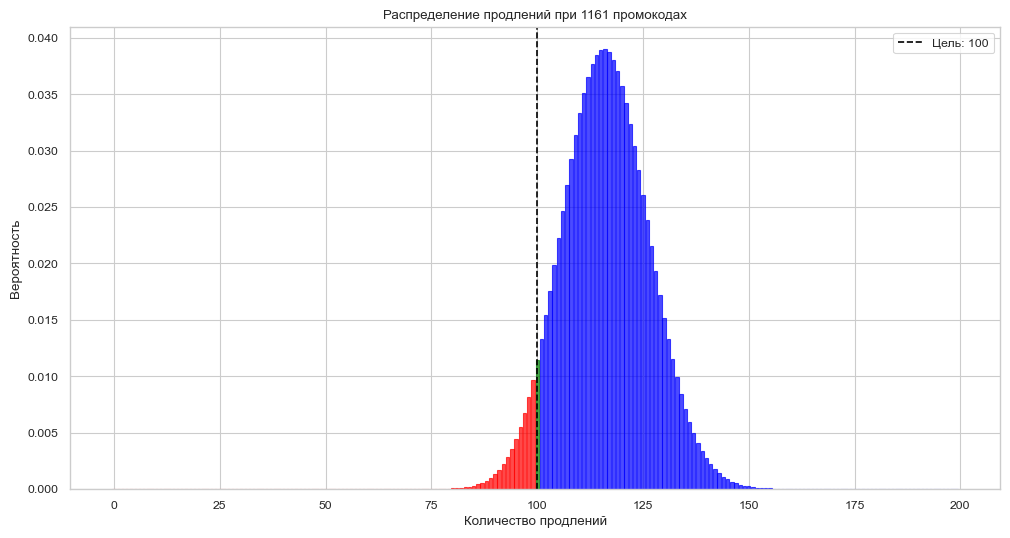

In [70]:
# Параметры задачи
k = 100  # целевое количество продлений
p = 0.1  # вероятность продления
alpha = 0.05  # допустимая вероятность неудачи

# Поиск минимального n
n = k
while stats.binom.cdf(k - 1, n, p) > alpha:
    n += 1

# Вывод результата
print(f"Минимальное количество промокодов: {n}")
print(f"Вероятность получить менее {k} продлений: {stats.binom.cdf(k-1, n, p):.5f}")

# Визуализация
x = np.arange(0, 200)
probabilities = stats.binom.pmf(x, n, p)

plt.figure(figsize=(12, 6))
bars = plt.bar(x, probabilities, alpha=0.7)

# Выделяем области
for i, val in enumerate(x):
    if val < k:
        bars[i].set_color("red")
    elif val == k:
        bars[i].set_color("green")
    else:
        bars[i].set_color("blue")

plt.axvline(x=k, color="black", linestyle="--", label=f"Цель: {k}")
plt.title(f"Распределение продлений при {n} промокодах")
plt.xlabel("Количество продлений")
plt.ylabel("Вероятность")
plt.legend()
plt.show()

## 4.2. Оценка вероятности открытия push-уведомлений в мобильном приложении

#### Условие: Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

Т.к работаем со случайными величинами - биноминальное распределение, чтобы решить задачу нужно использовать центральную предельную теорему.

Математическое ожидание: 400,000
Стандартное отклонение: 489.9
Вероятность не более 399,500 открытий: 15.4%


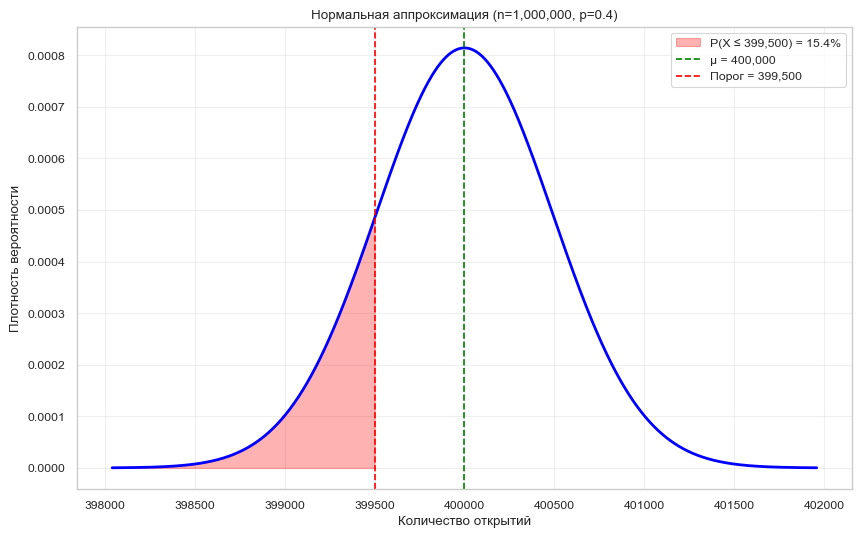

In [75]:
# Параметры
n = 1_000_000  # уведомлений
p = 0.4  # вероятность открытия
k = 399_500  # порог

# Нормальная аппроксимация
mu = n * p
sigma = np.sqrt(n * p * (1 - p))
z = (k + 0.5 - mu) / sigma  # с поправкой на непрерывность
prob = round(stats.norm.cdf(z) * 100, 2)

print(f"Математическое ожидание: {mu:,.0f}")
print(f"Стандартное отклонение: {sigma:,.1f}")
print(f"Вероятность не более {k:,} открытий: {prob}%")

# График
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
y = stats.norm.pdf(x, mu, sigma)

plt.figure(figsize=(10, 6))
plt.plot(x, y, "b-", linewidth=2)

# Заливка области <= 399500
x_fill = np.linspace(mu - 4 * sigma, k, 500)
y_fill = stats.norm.pdf(x_fill, mu, sigma)
plt.fill_between(
    x_fill, y_fill, color="red", alpha=0.3, label=f"P(X ≤ {k:,}) = {prob}%"
)

# Вертикальные линии
plt.axvline(mu, color="green", linestyle="--", label=f"μ = {mu:,.0f}")
plt.axvline(k, color="red", linestyle="--", label=f"Порог = {k:,}")

plt.title(f"Нормальная аппроксимация (n={n:,}, p={p})")
plt.xlabel("Количество открытий")
plt.ylabel("Плотность вероятности")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# 📊 Итоги EDA

## 📈 Основные выводы по данным

### 💰 Выручка и подписки
- **Пользователи без подписки** приносят на **12-20% больше дохода**, чем пользователи с подпиской
- **Разница в количестве** пользователей с подпиской и без составляет всего **8%**
- **Новые пользователи** чаще берут подписку, **старые пользователи** в основном обходятся без нее

### 🎯 Рекомендация
Требуется **стратегия привлечения старых пользователей** к подписке:
- Специальные акции для старых аккаунтов
- Временные пробные подписки в подарок
- Персональные скидки

## 🚗 Анализ поведения пользователей

### 📏 Дистанция поездок
- **Пользователи с подпиской**: значительные отклонения в расстоянии поездок
  - Часть пользователей использует самокаты для развлечения
  - Часть — для реальных нужд
- **Пользователи без подписки**: более стабильное распределение
  - Более предсказуемое использование
  - Вероятно, более осознанное потребление

### 👥 Демографические особенности
- **Новые пользователи** (чаще с подпиской) — вероятно, моложе
- **Старые пользователи** (чаще без подписки) — вероятно, старше и более консервативны

---

## ✅ Проверка гипотез

### 1. Время поездок ✅ **ПОДТВЕРЖДЕНА**
> Пользователи с подпиской тратят в среднем **больше времени** на поездки
- Разница: **1 минута** в среднем

### 2. Дистанция поездок 🤔 **СПОРНАЯ**
> t-статистика отрицательная
- В среднем пользователи проезжают **чуть меньше 3130м**
- Ближе к **3130м**, чем значительно меньше

### 3. Помесячная выручка ❌ **ОПРОВЕРГНУТА**
> Помесячная выручка с пользователей с подпиской **меньше**, чем без нее
- Подтверждается анализом поведения:
  - Новые пользователи (с подпиской) чаще используют самокаты для развлечения
  - Менее эффективное использование услуги

### 4. Теоретическая гипотеза 📚 **НЕ ПОДТВЕРЖДЕНА, НЕ ОПРОВЕРГНУТА**
> Ответ на теоретический вопрос о методе
- **Метод `scipy.stats.ttest_rel`** решает поставленную задачу

---

## 📊 Анализ распределений

### 1. Биномиальное распределение (промокоды) 🎫
- **Минимум промокодов**: **1161**
- **Цель**: выполнение плана в **5%** конверсии

### 2. Биномиальное распределение (уведомления) 📱
- Использована **аппроксимация и ЦПТ**
- **Вероятность**: **15.4%**
- **Событие**: уведомления откроют **не более 399.5k** пользователей

---

## 🎯 Ключевые инсайты

### 🔄 Паттерны поведения
1. **Подписка ≠ большая выручка** — пользователи без подписки приносят больше дохода
2. **Возрастной фактор** — молодые пользователи чаще берут подписку
3. **Разное использование** — подписка ассоциируется с менее эффективным использованием

### 🚀 Рекомендации
1. **Пересмотреть модель подписки** для увеличения выручки
2. **Сегментировать предложения** по возрасту и стажу пользователя
3. **Стимулировать эффективное использование** самокатов у подписчиков
4. **Разработать таргетированные акции** для старых пользователей